Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image
from sklearn.preprocessing import StandardScaler
from keras.preprocessing import image
import os
import shutil
from sklearn.model_selection import train_test_split

In [2]:

import tensorflow as tf
tf.__version__

!sudo pip3 install keras

from tensorflow.python.keras.engine.sequential import Sequential

from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator()

Uploading data

In [34]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Split the images in ValData (Bact Pneumonia) folder for validation and test set.

In [ ]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# # path to the directory where images are stored
# image_directory = '/content/gdrive/MyDrive/Covid19 XRAY/ValData/BacterialPneumonia'

# # Directories to store the validation and test sets
# validation_directory = '/content/gdrive/MyDrive/Covid19 XRAY/newValData/BactPneumonia'
# test_directory = '/content/gdrive/MyDrive/Covid19 XRAY/testData/BactPneumonia'

# os.makedirs(validation_directory, exist_ok=True)
# os.makedirs(test_directory, exist_ok=True)

# # Retrieve the list of image files in the folder
# image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# # Split the image files into validation and test sets
# validation_files, test_files = train_test_split(image_files, test_size=0.4, random_state=42)

# # Move the validation files to the validation directory
# for validation_file in validation_files:
#     src = os.path.join(image_directory, validation_file)
#     dst = os.path.join(validation_directory, validation_file)
#     shutil.copyfile(src, dst)

# # Move the test files to the test directory
# for test_file in test_files:
#     src = os.path.join(image_directory, test_file)
#     dst = os.path.join(test_directory, test_file)
#     shutil.copyfile(src, dst)


In [54]:
# # path to the directory where images are stored
# image_directory = '/content/gdrive/MyDrive/Covid19 XRAY/ValData/COVID-19'

# #Directories to store the validation and test sets
# validation_directory = '/content/gdrive/MyDrive/Covid19 XRAY/newValData/Covid-19'
# test_directory = '/content/gdrive/MyDrive/Covid19 XRAY/testData/Covid-19'

# os.makedirs(validation_directory, exist_ok=True)
# os.makedirs(test_directory, exist_ok=True)

# # Retrieve the list of image files in the folder
# image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# # Split the image files into validation and test sets
# validation_files, test_files = train_test_split(image_files, test_size=0.4, random_state=42)

# # Move the validation files to the validation directory
# for validation_file in validation_files:
#     src = os.path.join(image_directory, validation_file)
#     dst = os.path.join(validation_directory, validation_file)
#     shutil.copyfile(src, dst)

# # Move the test files to the test directory
# for test_file in test_files:
#     src = os.path.join(image_directory, test_file)
#     dst = os.path.join(test_directory, test_file)
#     shutil.copyfile(src, dst)

In [ ]:
# # path to the directory where images are stored
# image_directory = '/content/gdrive/MyDrive/Covid19 XRAY/ValData/Normal'

# # # Directories to store the validation and test sets
# validation_directory = '/content/gdrive/MyDrive/Covid19 XRAY/newValData/Normal'
# test_directory = '/content/gdrive/MyDrive/Covid19 XRAY/testData/Normal'

# os.makedirs(validation_directory, exist_ok=True)
# os.makedirs(test_directory, exist_ok=True)

# # Retrieve the list of image files in the folder
# image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# # Split the image files into validation and test sets
# validation_files, test_files = train_test_split(image_files, test_size=0.4, random_state=42)

# # Move the validation files to the validation directory
# for validation_file in validation_files:
#     src = os.path.join(image_directory, validation_file)
#     dst = os.path.join(validation_directory, validation_file)
#     shutil.copyfile(src, dst)

# # Move the test files to the test directory
# for test_file in test_files:
#     src = os.path.join(image_directory, test_file)
#     dst = os.path.join(test_directory, test_file)
#     shutil.copyfile(src, dst)

In [ ]:
# # path to the directory where images are stored
# image_directory = '/content/gdrive/MyDrive/Covid19 XRAY/ValData/ViralPneumonia'

# #Directories to store the validation and test sets
# validation_directory = '/content/gdrive/MyDrive/Covid19 XRAY/newValData/ViralPneumonia'
# test_directory = '/content/gdrive/MyDrive/Covid19 XRAY/testData/ViralPneumonia'

# os.makedirs(validation_directory, exist_ok=True)
# os.makedirs(test_directory, exist_ok=True)

# # Retrieve the list of image files in the folder
# image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# # Split the image files into validation and test sets
# validation_files, test_files = train_test_split(image_files, test_size=0.4, random_state=42)

# # Move the validation files to the validation directory
# for validation_file in validation_files:
#     src = os.path.join(image_directory, validation_file)
#     dst = os.path.join(validation_directory, validation_file)
#     shutil.copyfile(src, dst)

# # Move the test files to the test directory
# for test_file in test_files:
#     src = os.path.join(image_directory, test_file)
#     dst = os.path.join(test_directory, test_file)
#     shutil.copyfile(src, dst)

Data augmentation for covid-19 images in training set folder

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Specify the path to the directory where your COVID-19 images are stored
# covid19_directory = '/content/gdrive/MyDrive/Covid19 XRAY/TrainData/COVID-19'

# # Create a directory to store augmented images
# augmented_directory = '/content/gdrive/MyDrive/Covid19 XRAY/TrainData/Covid-19 augmentation images'
# os.makedirs(augmented_directory, exist_ok=True)

# # Load COVID-19 images from the directory
# covid19_images = [f for f in os.listdir(covid19_directory) if os.path.isfile(os.path.join(covid19_directory, f))]

# # Create an ImageDataGenerator with augmentation settings
# data_gen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Perform data augmentation for each COVID-19 image
# num_augmented_images = 300
# max_loops = num_augmented_images // len(covid19_images)

# for img_file in covid19_images:
#     img_path = os.path.join(covid19_directory, img_file)
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = img.reshape((1,) + img.shape)  # Reshape for data generator

#     # Generate up to max_loops augmented images for each original image
#     i = 0
#     for batch in data_gen.flow(img, batch_size=1, save_to_dir=augmented_directory, save_prefix='aug', save_format='jpeg'):
#         i += 1
#         if i >= max_loops:
#             break

# # If the total number of augmented images is less than num_augmented_images,
# # generate additional augmented images until num_augmented_images is reached
# remaining_images = num_augmented_images - max_loops * len(covid19_images)
# if remaining_images > 0:
#     for img_file in covid19_images:
#         img_path = os.path.join(covid19_directory, img_file)
#         img = cv2.imread(img_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = img.reshape((1,) + img.shape)  # Reshape for data generator

#         # Generate additional remaining_images augmented images for each original image
#         for batch in data_gen.flow(img, batch_size=1, save_to_dir=augmented_directory, save_prefix='aug', save_format='jpeg'):
#             remaining_images -= 1
#             if remaining_images == 0:
#                 break
#         if remaining_images == 0:
#             break



Copy augmentation images in training set to one folder with covid-19 images

In [ ]:
# import os
# import shutil

# # Paths to the source folder and destination folder
# source_folder = "/content/gdrive/MyDrive/Covid19 XRAY/TrainData/Covid-19 augmentation images"
# destination_folder = "/content/gdrive/MyDrive/Covid19 XRAY/TrainData/COVID-19"

# # Get a list of all files (images) in the source folder
# image_files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# # Copy each image file from the source folder to the destination folder
# for image_file in image_files:
#     source_path = os.path.join(source_folder, image_file)
#     destination_path = os.path.join(destination_folder, image_file)
#     shutil.copy(source_path, destination_path)


data augmentation for covid-19 images (2)

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Specify the path to the directory where your COVID-19 images are stored
# covid19_directory = '/content/gdrive/MyDrive/Covid19 XRAY/TrainData/COVID-19'

# # Create a directory to store augmented images
# augmented_directory = '/content/gdrive/MyDrive/Covid19 XRAY/TrainData/Covid augm'
# os.makedirs(augmented_directory, exist_ok=True)

# # Load COVID-19 images from the directory
# covid19_images = [f for f in os.listdir(covid19_directory) if os.path.isfile(os.path.join(covid19_directory, f))]

# # Create an ImageDataGenerator with augmentation settings
# data_gen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Perform data augmentation for each COVID-19 image
# num_augmented_images = 546
# max_loops = num_augmented_images // len(covid19_images)

# for img_file in covid19_images:
#     img_path = os.path.join(covid19_directory, img_file)
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = img.reshape((1,) + img.shape)  # Reshape for data generator

#     # Generate up to max_loops augmented images for each original image
#     i = 0
#     for batch in data_gen.flow(img, batch_size=1, save_to_dir=augmented_directory, save_prefix='aug', save_format='jpeg'):
#         i += 1
#         if i >= max_loops:
#             break

# # If the total number of augmented images is less than num_augmented_images,
# # generate additional augmented images until num_augmented_images is reached
# remaining_images = num_augmented_images - max_loops * len(covid19_images)
# if remaining_images > 0:
#     for img_file in covid19_images:
#         img_path = os.path.join(covid19_directory, img_file)
#         img = cv2.imread(img_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = img.reshape((1,) + img.shape)  # Reshape for data generator

#         # Generate additional remaining_images augmented images for each original image
#         for batch in data_gen.flow(img, batch_size=1, save_to_dir=augmented_directory, save_prefix='aug', save_format='jpeg'):
#             remaining_images -= 1
#             if remaining_images == 0:
#                 break
#         if remaining_images == 0:
#             break


Copy augmentation images in training set to one folder with covid-19 images

In [ ]:
# import os
# import shutil

# # Paths to the source folder and destination folder
# source_folder = "/content/gdrive/MyDrive/Covid19 XRAY/TrainData/Covid augm"
# destination_folder = "/content/gdrive/MyDrive/Covid19 XRAY/TrainData/COVID-19"

# # Get a list of all files (images) in the source folder
# image_files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# # Copy each image file from the source folder to the destination folder
# for image_file in image_files:
#     source_path = os.path.join(source_folder, image_file)
#     destination_path = os.path.join(destination_folder, image_file)
#     shutil.copy(source_path, destination_path)

data augmentation for Bact pnem images

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import cv2
# import os

# # Specify the path to the directory where bacterial pneumonia images are stored
# bactpnem_directory = '/content/gdrive/MyDrive/Covid19 XRAY/TrainData/BacterialPneumonia'

# # Create a directory to store augmented images
# augmented_directory = '/content/gdrive/MyDrive/Covid19 XRAY/TrainData/BactPnem augm'
# os.makedirs(augmented_directory, exist_ok=True)

# # Load bacterial pneumonia images from the directory
# bactpnem_images = [f for f in os.listdir(bactpnem_directory) if os.path.isfile(os.path.join(bactpnem_directory, f))]

# # Create an ImageDataGenerator with augmentation settings
# data_gen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Perform data augmentation for each bacterial pneumonia image
# num_augmented_images = 251
# max_loops = num_augmented_images // len(bactpnem_images)

# for img_file in bactpnem_images:
#     img_path = os.path.join(bactpnem_directory, img_file)
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = img.reshape((1,) + img.shape)  # Reshape for data generator

#     # Generate up to max_loops augmented images for each original image
#     i = 0
#     for batch in data_gen.flow(img, batch_size=1, save_to_dir=augmented_directory, save_prefix='aug', save_format='jpeg'):
#         i += 1
#         if i >= max_loops:
#             break

# # If the total number of augmented images is less than num_augmented_images,
# # generate additional augmented images until num_augmented_images is reached
# remaining_images = num_augmented_images - max_loops * len(bactpnem_images)
# if remaining_images > 0:
#     for img_file in bactpnem_images:
#         img_path = os.path.join(bactpnem_directory, img_file)
#         img = cv2.imread(img_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = img.reshape((1,) + img.shape)  # Reshape for data generator

#         # Generate additional remaining_images augmented images for each original image
#         for batch in data_gen.flow(img, batch_size=1, save_to_dir=augmented_directory, save_prefix='aug', save_format='jpeg'):
#             remaining_images -= 1
#             if remaining_images == 0:
#                 break
#         if remaining_images == 0:
#             break


Copy augmentation bact pneumonia images to bacterial pneumonia folder

In [ ]:
# import os
# import shutil

# # Paths to the source folder and destination folder
# source_folder = "/content/gdrive/MyDrive/Covid19 XRAY/TrainData/BactPnem augm"
# destination_folder = "/content/gdrive/MyDrive/Covid19 XRAY/TrainData/BacterialPneumonia"

# # Get a list of all files (images) in the source folder
# image_files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# # Copy each image file from the source folder to the destination folder
# for image_file in image_files:
#     source_path = os.path.join(source_folder, image_file)
#     destination_path = os.path.join(destination_folder, image_file)
#     shutil.copy(source_path, destination_path)

data augmentation for viral pnem images

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import cv2
# import os

# # Specify the path to the directory where viral pneumonia images are stored
# viralpnem_directory = '/content/gdrive/MyDrive/Covid19 XRAY/TrainData/ViralPneumonia'

# # Create a directory to store augmented images
# augmented_directory = '/content/gdrive/MyDrive/Covid19 XRAY/TrainData/ViralPnem augm'
# os.makedirs(augmented_directory, exist_ok=True)

# # Load viral pneumonia images from the directory
# viralpnem_images = [f for f in os.listdir(viralpnem_directory) if os.path.isfile(os.path.join(viralpnem_directory, f))]

# # Create an ImageDataGenerator with augmentation settings
# data_gen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Perform data augmentation for each viral pneumonia image
# num_augmented_images = 489
# max_loops = num_augmented_images // len(viralpnem_images)

# for img_file in viralpnem_images:
#     img_path = os.path.join(viralpnem_directory, img_file)
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = img.reshape((1,) + img.shape)  # Reshape for data generator

#     # Generate up to max_loops augmented images for each original image
#     i = 0
#     for batch in data_gen.flow(img, batch_size=1, save_to_dir=augmented_directory, save_prefix='aug', save_format='jpeg'):
#         i += 1
#         if i >= max_loops:
#             break

# # If the total number of augmented images is less than num_augmented_images,
# # generate additional augmented images until num_augmented_images is reached
# remaining_images = num_augmented_images - max_loops * len(viralpnem_images)
# if remaining_images > 0:
#     for img_file in viralpnem_images:
#         img_path = os.path.join(viralpnem_directory, img_file)
#         img = cv2.imread(img_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = img.reshape((1,) + img.shape)  # Reshape for data generator

#         # Generate additional remaining_images augmented images for each original image
#         for batch in data_gen.flow(img, batch_size=1, save_to_dir=augmented_directory, save_prefix='aug', save_format='jpeg'):
#             remaining_images -= 1
#             if remaining_images == 0:
#                 break
#         if remaining_images == 0:
#             break


Copy augmentation viral augm  pneumonia images to viral  pneumonia folder

In [ ]:
# import os
# import shutil

# # Paths to the source folder and destination folder
# source_folder = "/content/gdrive/MyDrive/Covid19 XRAY/TrainData/ViralPnem augm"
# destination_folder = "/content/gdrive/MyDrive/Covid19 XRAY/TrainData/ViralPneumonia"

# # Get a list of all files (images) in the source folder
# image_files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# # Copy each image file from the source folder to the destination folder
# for image_file in image_files:
#     source_path = os.path.join(source_folder, image_file)
#     destination_path = os.path.join(destination_folder, image_file)
#     shutil.copy(source_path, destination_path)

Data augmantation for covid-19 images in validation set

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Specify the path to the directory where your COVID-19 images are stored
# covid19_directory = '/content/gdrive/MyDrive/Covid19 XRAY/newValData/Covid-19'

# # Create a directory to store augmented images
# augmented_directory = '/content/gdrive/MyDrive/Covid19 XRAY/newValData/Covid -19 augmentation'
# os.makedirs(augmented_directory, exist_ok=True)

# # Load COVID-19 images from the directory
# covid19_images = [f for f in os.listdir(covid19_directory) if os.path.isfile(os.path.join(covid19_directory, f))]

# # Create an ImageDataGenerator with augmentation settings
# data_gen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Perform data augmentation for each COVID-19 image
# num_augmented_images = 200
# max_loops = num_augmented_images // len(covid19_images)

# for img_file in covid19_images:
#     img_path = os.path.join(covid19_directory, img_file)
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = img.reshape((1,) + img.shape)  # Reshape for data generator

#     # Generate up to max_loops augmented images for each original image
#     i = 0
#     for batch in data_gen.flow(img, batch_size=1, save_to_dir=augmented_directory, save_prefix='aug', save_format='jpeg'):
#         i += 1
#         if i >= max_loops:
#             break

# # If the total number of augmented images is less than num_augmented_images,
# # generate additional augmented images until num_augmented_images is reached
# remaining_images = num_augmented_images - max_loops * len(covid19_images)
# if remaining_images > 0:
#     for img_file in covid19_images:
#         img_path = os.path.join(covid19_directory, img_file)
#         img = cv2.imread(img_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = img.reshape((1,) + img.shape)  # Reshape for data generator

#         # Generate additional remaining_images augmented images for each original image
#         for batch in data_gen.flow(img, batch_size=1, save_to_dir=augmented_directory, save_prefix='aug', save_format='jpeg'):
#             remaining_images -= 1
#             if remaining_images == 0:
#                 break
#         if remaining_images == 0:
#             break

In [ ]:
# import os
# import shutil

# # Paths to the source folder and destination folder
# source_folder = "/content/gdrive/MyDrive/Covid19 XRAY/newValData/Covid -19 augmentation"
# destination_folder = "/content/gdrive/MyDrive/Covid19 XRAY/newValData/Covid-19"

# # Get a list of all files (images) in the source folder
# image_files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# # Copy each image file from the source folder to the destination folder
# for image_file in image_files:
#     source_path = os.path.join(source_folder, image_file)
#     destination_path = os.path.join(destination_folder, image_file)
#     shutil.copy(source_path, destination_path)

Upload data

In [3]:
!pip install gdown

import gdown
import zipfile
import glob

# ---- Bringing the dataset ---- #

url = 'https://drive.google.com/uc?id=1WMzU21xkmohrJ_7zgppXLwcBnvdmuwsM' # Correct URL
output = 'dataset.zip' # Save the output
gdown.download(url, output, quiet=False)

# ---- Extract the data from the zip ---- #

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('dataset')

data = glob.glob('/content/dataset/*/*', recursive=True)


Downloading...
From: https://drive.google.com/uc?id=1WMzU21xkmohrJ_7zgppXLwcBnvdmuwsM
To: /content/dataset.zip
100%|██████████| 380M/380M [00:57<00:00, 6.56MB/s]


Upload train data

In [4]:
bactPneu_train = Path("/content/dataset/Covid19 XRAY/TrainData/BacterialPneumonia")
covidData_train = Path("/content/dataset/Covid19 XRAY/TrainData/COVID-19")
noramalData_train = Path("/content/dataset/Covid19 XRAY/TrainData/Normal")
viralPneu_train = Path("/content/dataset/Covid19 XRAY/TrainData/ViralPneumonia")


Upload val data

In [13]:
bactPneu_valdata = Path("/content/dataset/Covid19 XRAY/newValData/BacterialPneumonia")
covidData_val = Path("/content/dataset/Covid19 XRAY/newValData/COVID-19")
normalData_val = Path("/content/dataset/Covid19 XRAY/newValData/Normal")
viralPneumonia_val = Path ("/content/dataset/Covid19 XRAY/newValData/ViralPneumonia")

PATH LIST AND LABELS of train set

In [14]:
Covid_Path = list(covidData_train.glob(r"*.jpeg"))
Bact_Pneu_JPG_Path = list(bactPneu_train.glob(r"*.jpeg"))
Normal_JPG_Path = list(noramalData_train.glob(r"*.jpeg"))
viralPneu_train_JPG_Path = list(viralPneu_train.glob(r"*.jpeg"))


In [15]:
print("Covid: \n",Covid_Path[0:5])
print("BACT_PNEU: \n",Bact_Pneu_JPG_Path[0:5])
print("---"*20)
print("NORMAL: \n",Normal_JPG_Path[0:5])
print("---"*20)
print("viralPneu_train: \n",viralPneu_train_JPG_Path[0:5])
print("---"*20)

Covid: 
 [PosixPath('/content/dataset/Covid19 XRAY/TrainData/COVID-19/aug_0_2389.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/TrainData/COVID-19/aug_0_3116.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/TrainData/COVID-19/aug_0_4122.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/TrainData/COVID-19/aug_0_8524.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/TrainData/COVID-19/aug_0_1435.jpeg')]
BACT_PNEU: 
 [PosixPath('/content/dataset/Covid19 XRAY/TrainData/BacterialPneumonia/_424_4332572.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/TrainData/BacterialPneumonia/_157_6020784.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/TrainData/BacterialPneumonia/_69_9110792.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/TrainData/BacterialPneumonia/_550_6411640.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/TrainData/BacterialPneumonia/_560_3657871.jpeg')]
------------------------------------------------------------
NORMAL: 
 [PosixPath('/content/dataset/Covid19 XRAY/TrainData/Norm

Array of all training data images and adding labels

In [16]:
Main_JPG_Path = []

for JPGs_Bact in Bact_Pneu_JPG_Path:
    Main_JPG_Path.append(JPGs_Bact)

for JPGs_Normal in Normal_JPG_Path:
    Main_JPG_Path.append(JPGs_Normal)

for JPGs_Viral in viralPneu_train_JPG_Path:
    Main_JPG_Path.append(JPGs_Viral)

for JPGs_Corona in Covid_Path:
    Main_JPG_Path.append(JPGs_Corona)


JPG_All_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Main_JPG_Path))
print("BacterialPneumonia: ",JPG_All_Labels.count("BacterialPneumonia"))
print("COVID-19: ",JPG_All_Labels.count("COVID-19"))
print("Normal: ",JPG_All_Labels.count("Normal"))
print("ViralPneumonia: ",JPG_All_Labels.count("ViralPneumonia"))


BacterialPneumonia:  650
COVID-19:  871
Normal:  901
ViralPneumonia:  882


In [17]:
Main_Data = pd.DataFrame({
    "JPG": Main_JPG_Path,
    "CATEGORY": JPG_All_Labels})
print(Main_Data.head(-1))

                                                    JPG            CATEGORY
0     /content/dataset/Covid19 XRAY/TrainData/Bacter...  BacterialPneumonia
1     /content/dataset/Covid19 XRAY/TrainData/Bacter...  BacterialPneumonia
2     /content/dataset/Covid19 XRAY/TrainData/Bacter...  BacterialPneumonia
3     /content/dataset/Covid19 XRAY/TrainData/Bacter...  BacterialPneumonia
4     /content/dataset/Covid19 XRAY/TrainData/Bacter...  BacterialPneumonia
...                                                 ...                 ...
3298  /content/dataset/Covid19 XRAY/TrainData/COVID-...            COVID-19
3299  /content/dataset/Covid19 XRAY/TrainData/COVID-...            COVID-19
3300  /content/dataset/Covid19 XRAY/TrainData/COVID-...            COVID-19
3301  /content/dataset/Covid19 XRAY/TrainData/COVID-...            COVID-19
3302  /content/dataset/Covid19 XRAY/TrainData/COVID-...            COVID-19

[3303 rows x 2 columns]


PATH LIST AND LABELS of val set

In [18]:
covidPath_validation = list(covidData_val .glob(r"*.jpeg"))
bactPneu_validationPath = list(bactPneu_valdata.glob(r"*.jpeg"))
normalimages_validationPath = list(normalData_val.glob(r"*.jpeg"))
viralPneu_validationPath = list(viralPneumonia_val.glob(r"*.jpeg"))

In [19]:
print("Covid: \n",covidPath_validation[0:5])
print("BACT_PNEU: \n",bactPneu_validationPath[0:5])
print("---"*20)
print("NORMAL: \n",normalimages_validationPath[0:5])
print("---"*20)
print("viralPneu_train: \n",viralPneu_validationPath[0:5])
print("---"*20)


Covid: 
 [PosixPath('/content/dataset/Covid19 XRAY/newValData/COVID-19/aug_0_7914.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/newValData/COVID-19/aug_0_1796.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/newValData/COVID-19/aug_0_9836.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/newValData/COVID-19/aug_0_7230.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/newValData/COVID-19/4.jpeg')]
BACT_PNEU: 
 [PosixPath('/content/dataset/Covid19 XRAY/newValData/BacterialPneumonia/139.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/newValData/BacterialPneumonia/298.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/newValData/BacterialPneumonia/22.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/newValData/BacterialPneumonia/293.jpeg'), PosixPath('/content/dataset/Covid19 XRAY/newValData/BacterialPneumonia/158.jpeg')]
------------------------------------------------------------
NORMAL: 
 [PosixPath('/content/dataset/Covid19 XRAY/newValData/Normal/298.jpeg'), PosixPath('/content/dataset/

array of all val sets images and adding labesl

In [20]:
Val_JPG_Path = []

for bactVal in bactPneu_validationPath:
    Val_JPG_Path.append(bactVal)

for normalVal in normalimages_validationPath:
    Val_JPG_Path.append(normalVal)

for viralVal in viralPneu_validationPath:
    Val_JPG_Path.append(viralVal)

for covidVal in covidPath_validation:
   Val_JPG_Path.append(covidVal)


JPG_val_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Val_JPG_Path))
print("BacterialPneumonia validation set: ",JPG_val_Labels.count("BacterialPneumonia"))
print("COVID-19 validation set: ",JPG_val_Labels.count("COVID-19"))
print("Normal validation set: ",JPG_val_Labels.count("Normal"))
print("ViralPneumonia validation set: ",JPG_val_Labels.count("ViralPneumonia"))

BacterialPneumonia validation set:  194
COVID-19 validation set:  202
Normal validation set:  270
ViralPneumonia validation set:  123


Vizualization

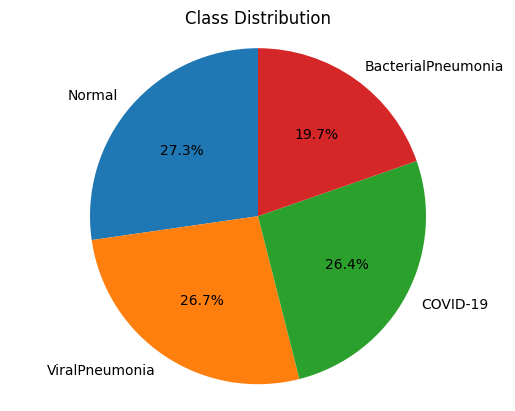

In [21]:
category_counts = Main_Data['CATEGORY'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Class Distribution')

# Display the chart
plt.axis('equal')
plt.show()




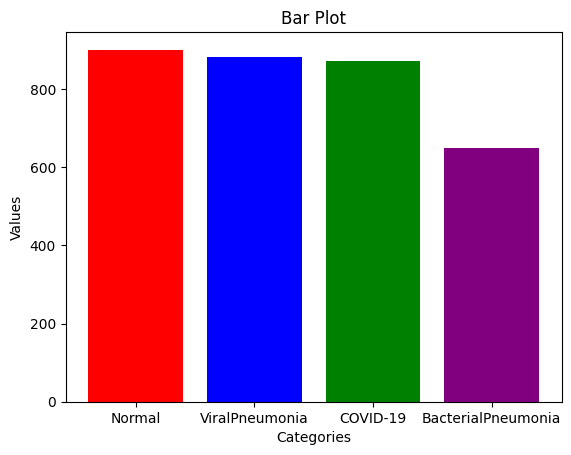

In [15]:

# Create a bar plot
colors = ['red', 'blue', 'green','purple','orange']
plt.bar(category_counts.index, category_counts,color=colors)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot')

# Display the plot
plt.show()

Print images from different categories

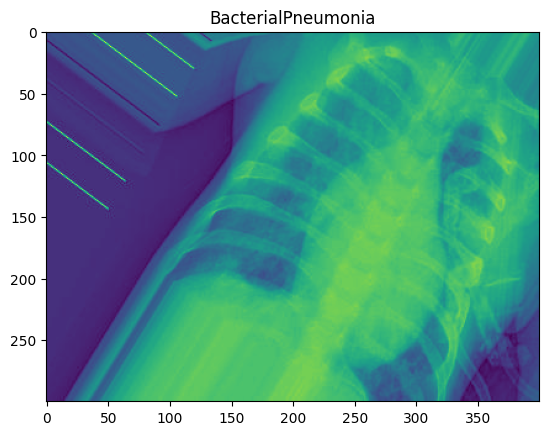

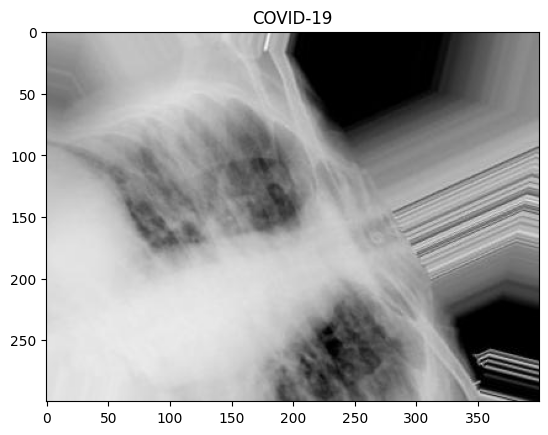

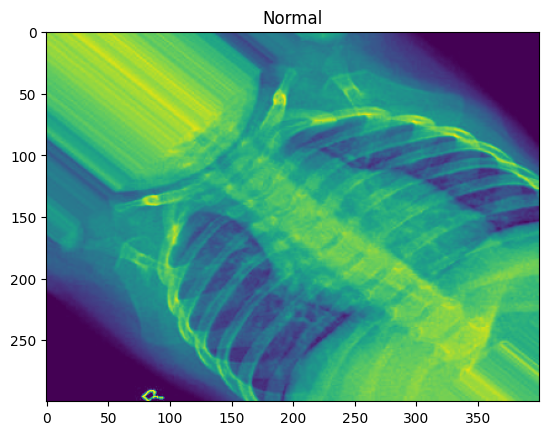

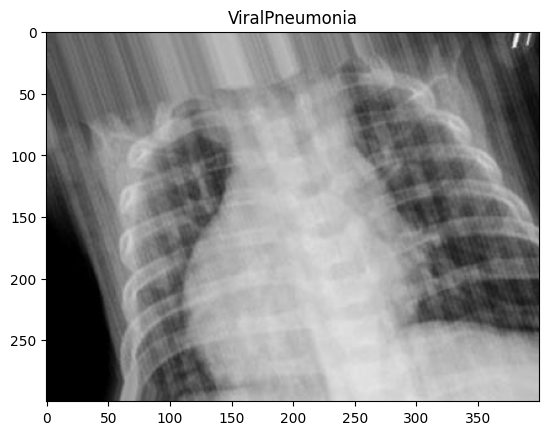

In [23]:
grouped_data = Main_Data.groupby('CATEGORY')

for category, group in grouped_data:
    image_path = group.iloc[0]['JPG']
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(category)
    plt.show()

Check if images have the same size or not in training set

In [24]:
first_image_path = Main_JPG_Path[0]
first_image = Image.open(first_image_path)
first_image_size = first_image.size

same_size = True

for image_path in Main_JPG_Path[1:]:
    image = Image.open(image_path)
    image_size = image.size

    if image_size != first_image_size:
        same_size = False
        break

if same_size:
    print("All images in the train set have the same size")
    print (image_size)
else:
    print("Images have different sizes")

All images in the train set have the same size
(400, 300)


Resize to the same size validation set images

In [ ]:
# resized_val_images = []
# target_size = (400, 300)

# for image_path in Val_JPG_Path:
#     image = Image.open(image_path)
#     resized_image = image.resize(target_size)
#     resized_val_images.append(resized_image)

Data normalization for training set

In [25]:
# normalized_images = []
# labels_train = []
# for image_path in Main_JPG_Path:
#     # Load the image
#     image = Image.open(image_path)

#     # Convert image to NumPy array
#     image_array = np.array(image)

#     # Normalize pixel values
#     normalized_image_array = image_array / 255.0

#     # Append the normalized image array to the list
#     normalized_images.append(normalized_image_array)

#     label = os.path.split(os.path.split(image_path)[0])[1]
#     labels_train.append(label)


import cv2

normalized_images_gray = []
labels_train = []

for image_path in Main_JPG_Path:
    # Load the image
    image = Image.open(image_path)

    # Convert image to grayscale
    grayscale_image = image.convert('L')

    # Convert grayscale image to NumPy array
    image_array = np.array(grayscale_image)

    # Normalize pixel values
    normalized_image_array = image_array / 255.0

    # Append the normalized grayscale image array to the list
    normalized_images_gray.append(normalized_image_array)

    label = os.path.split(os.path.split(image_path)[0])[1]
    labels_train.append(label)




Print normalized pictures (training set)with their pixel values in order to check


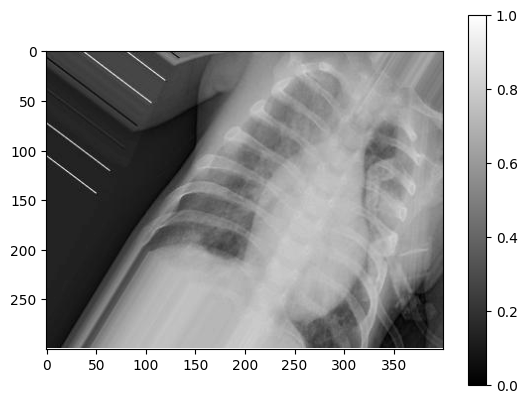

[[0.23921569 0.24705882 0.25490196 ... 0.53333333 0.5254902  0.51764706]
 [0.24705882 0.25098039 0.25490196 ... 0.53333333 0.5254902  0.51372549]
 [0.24313725 0.23921569 0.23921569 ... 0.5254902  0.52156863 0.51372549]
 ...
 [0.10588235 0.10588235 0.10196078 ... 0.29803922 0.29411765 0.28235294]
 [0.10588235 0.10588235 0.10196078 ... 0.30980392 0.30588235 0.29019608]
 [0.10588235 0.10588235 0.10196078 ... 0.30980392 0.30980392 0.29411765]]


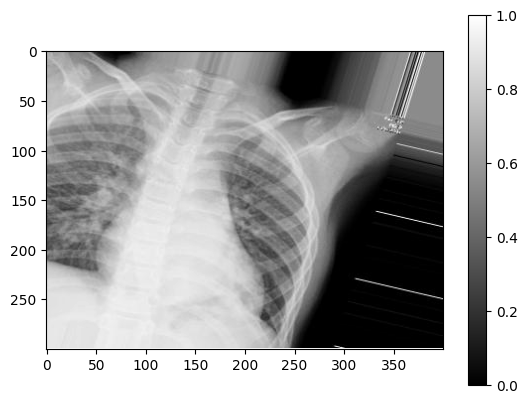

[[0.69803922 0.6627451  0.65490196 ... 0.54509804 0.54509804 0.54509804]
 [0.68627451 0.6627451  0.65490196 ... 0.54509804 0.54509804 0.54509804]
 [0.67843137 0.67843137 0.67058824 ... 0.54509804 0.54509804 0.54509804]
 ...
 [0.90588235 0.90588235 0.90588235 ... 0.00392157 0.00392157 0.00392157]
 [0.90588235 0.90588235 0.90588235 ... 0.00392157 0.00392157 0.00392157]
 [0.90588235 0.90588235 0.90588235 ... 0.         0.         0.        ]]


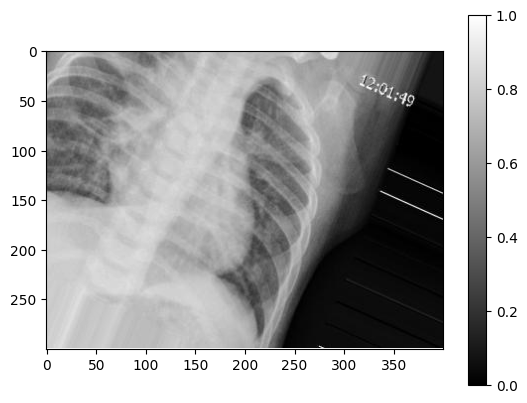

[[0.42352941 0.44313725 0.47058824 ... 0.07843137 0.07843137 0.07843137]
 [0.43529412 0.45098039 0.47843137 ... 0.07843137 0.07843137 0.07843137]
 [0.45098039 0.4627451  0.49019608 ... 0.07843137 0.07843137 0.07843137]
 ...
 [0.82745098 0.81176471 0.80784314 ... 0.04705882 0.05098039 0.05098039]
 [0.82745098 0.81176471 0.80784314 ... 0.03529412 0.04705882 0.05490196]
 [0.82352941 0.81176471 0.80392157 ... 0.01568627 0.02745098 0.03529412]]


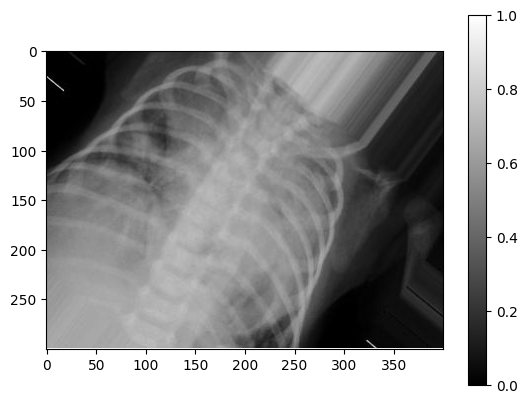

[[0.         0.         0.         ... 0.16078431 0.16078431 0.14509804]
 [0.         0.         0.         ... 0.16470588 0.16078431 0.14901961]
 [0.         0.         0.         ... 0.16862745 0.15686275 0.15294118]
 ...
 [0.65882353 0.65490196 0.65098039 ... 0.05490196 0.05490196 0.05490196]
 [0.65882353 0.65490196 0.65098039 ... 0.05490196 0.05490196 0.05490196]
 [0.65882353 0.65490196 0.65490196 ... 0.05490196 0.05490196 0.05490196]]


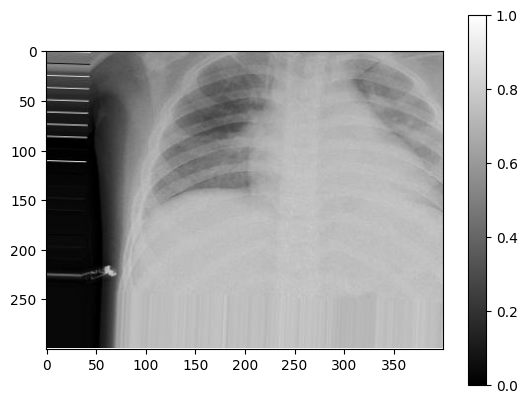

[[0.80392157 0.79607843 0.78431373 ... 0.59215686 0.61568627 0.62745098]
 [0.64313725 0.64705882 0.65882353 ... 0.6        0.62352941 0.63921569]
 [0.47058824 0.47843137 0.48627451 ... 0.61960784 0.63921569 0.64705882]
 ...
 [0.03137255 0.03137255 0.03137255 ... 0.7254902  0.75294118 0.77647059]
 [0.03137255 0.03137255 0.03137255 ... 0.7254902  0.75294118 0.77647059]
 [0.03137255 0.03137255 0.03137255 ... 0.7254902  0.75294118 0.77647059]]


In [26]:
num_images = 5

# Iterate over the first num_images in the normalized_images list

for i in range(num_images):

    # Plot the image
    plt.imshow(normalized_images_gray[i], cmap='gray')
    plt.colorbar()
    plt.show()
    # print picture value
    print(normalized_images_gray[i])



Resize  normalize and add labels for  validation images

In [27]:
normalized_val_images_gray = []
val_labels = []
target_size = (400, 300)

for image_path in Val_JPG_Path:
    # Load the image
    image = Image.open(image_path)

    # Convert image to grayscale
    grayscale_image = image.convert('L')

    # Resize the grayscale image
    resized_image = grayscale_image.resize(target_size)

    # Convert the resized grayscale image to NumPy array
    resized_image_array = np.array(resized_image)

    # Normalize pixel values
    normalized_image_array = resized_image_array / 255.0

    # Append the resized and normalized grayscale image arrays to the lists
    # resized_val_images.append(resized_image_array)
    normalized_val_images_gray.append(normalized_image_array)

    # Extract the label from the image path and append it to the labels list
    label = os.path.split(os.path.split(image_path)[0])[1]
    val_labels.append(label)

# Convert the lists to NumPy arrays
x_val = np.array(normalized_val_images_gray)
y_val = np.array(val_labels)

Print images

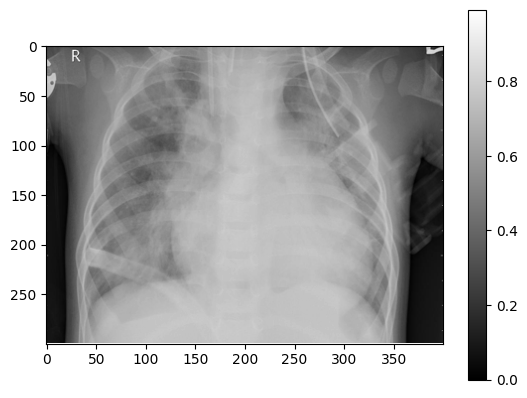

[[0.25882353 0.26666667 0.2745098  ... 0.16862745 0.15294118 0.16078431]
 [0.2627451  0.27058824 0.27843137 ... 0.18823529 0.28235294 0.39215686]
 [0.26666667 0.2745098  0.28235294 ... 0.69019608 0.77647059 0.79607843]
 ...
 [0.08235294 0.08235294 0.08235294 ... 0.10588235 0.11764706 0.12941176]
 [0.08627451 0.08627451 0.08627451 ... 0.10588235 0.11764706 0.12941176]
 [0.09019608 0.09019608 0.09019608 ... 0.10588235 0.11764706 0.12941176]]


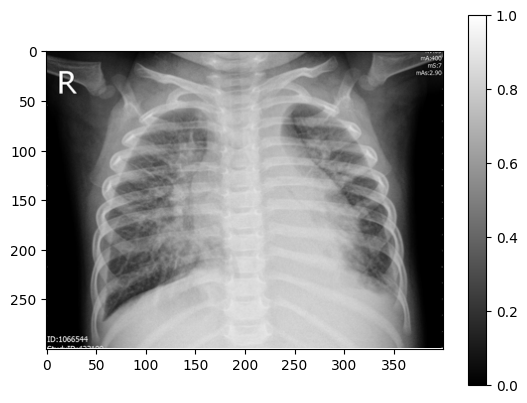

[[0.03529412 0.03529412 0.03921569 ... 0.52941176 0.2627451  0.2745098 ]
 [0.04313725 0.04313725 0.03921569 ... 0.52941176 0.35294118 0.25098039]
 [0.03529412 0.03921569 0.03921569 ... 0.59215686 0.21960784 0.23529412]
 ...
 [0.00784314 0.         0.04705882 ... 0.         0.         0.        ]
 [0.         0.14901961 0.74509804 ... 0.00392157 0.01960784 0.00784314]
 [0.2627451  0.58823529 0.50588235 ... 0.         0.18039216 0.29803922]]


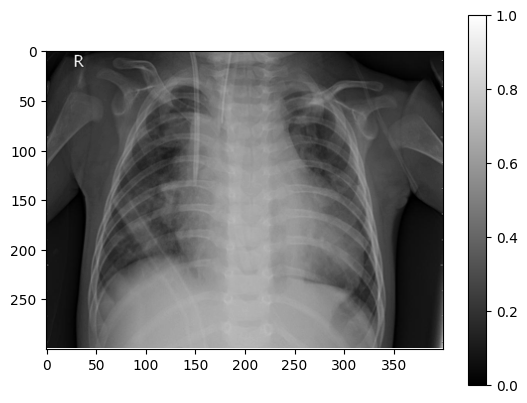

[[0.04705882 0.05490196 0.0627451  ... 0.0627451  0.0627451  0.0627451 ]
 [0.04705882 0.05490196 0.0627451  ... 0.0627451  0.0627451  0.0627451 ]
 [0.04705882 0.05490196 0.0627451  ... 0.0627451  0.0627451  0.0627451 ]
 ...
 [0.12156863 0.09411765 0.07843137 ... 0.47058824 0.58823529 0.70196078]
 [0.11764706 0.08627451 0.07843137 ... 0.49019608 0.60392157 0.71372549]
 [0.11372549 0.07843137 0.08235294 ... 0.50196078 0.60784314 0.71764706]]


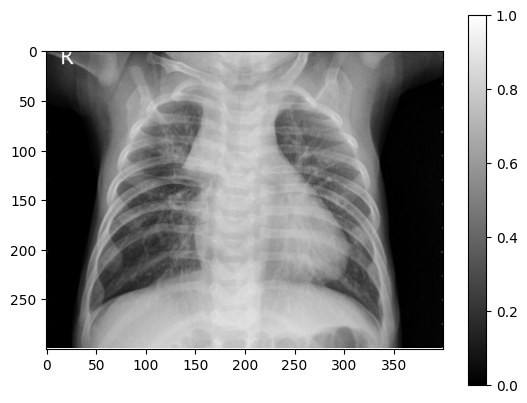

[[0.38823529 0.4        0.39215686 ... 0.23921569 0.23921569 0.22352941]
 [0.33333333 0.36862745 0.38823529 ... 0.22352941 0.23529412 0.22745098]
 [0.28235294 0.31764706 0.31764706 ... 0.22352941 0.21960784 0.22745098]
 ...
 [0.01568627 0.01568627 0.01568627 ... 0.02352941 0.02352941 0.02352941]
 [0.         0.01960784 0.01568627 ... 0.02352941 0.02352941 0.00784314]
 [0.32941176 0.05882353 0.01568627 ... 0.01960784 0.0745098  0.3372549 ]]


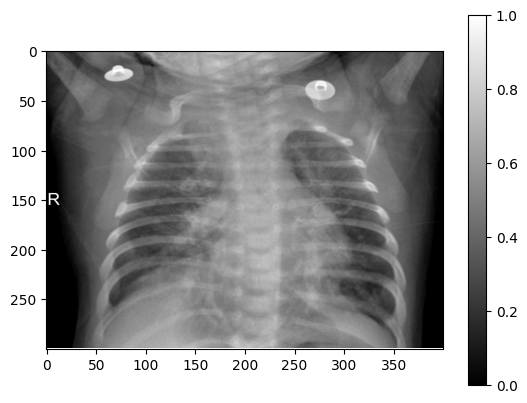

[[0.18431373 0.26666667 0.28235294 ... 0.22352941 0.20784314 0.2       ]
 [0.18431373 0.26666667 0.28235294 ... 0.22745098 0.19607843 0.19607843]
 [0.17647059 0.25098039 0.26666667 ... 0.22745098 0.20392157 0.2       ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [28]:
num_images = 5

# Iterate over the first num_images in the normalized_images list

for i in range(num_images):

    # Plot the image
    plt.imshow(normalized_val_images_gray[i], cmap='gray')
    plt.colorbar()
    plt.show()
    # print picture value
    print(normalized_val_images_gray[i])


Create CNN

In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 400, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense (256, activation='relu')),
# model.add(Dense (4, activation='softmax'))

CNN with regualization

In [ ]:
# from tensorflow.keras import regularizers

# model = models.Sequential()

# #convolutional layer with L2 regularization
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 400, 1), kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))

# #another convolutional layer with L2 regularization
# model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))

# # another convolutional layer with L2 regularization
# model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(Flatten())

# # dense layer with L2 regularization
# model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# # dropout layer to reduce overfitting
# model.add(layers.Dropout(0.5))

# model.add(Dense(4, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

NameError: ignored

Adding eadrly stopping

In [ ]:
# from tensorflow.keras import regularizers
# from tensorflow.keras.callbacks import EarlyStopping

# model = models.Sequential()

# # Convolutional layer with L2 regularization
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 400, 1), kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))

# # Another convolutional layer with L2 regularization
# model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))

# # Another convolutional layer with L2 regularization
# model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(Flatten())

# # Dense layer with L2 regularization
# model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# # Dropout layer to reduce overfitting
# model.add(layers.Dropout(0.5))

# model.add(Dense(4, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# # Define the early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)




Adding learning rate:

In [ ]:
# from tensorflow.keras import regularizers
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers.schedules import ExponentialDecay

# # Learning rate schedule
# initial_learning_rate = 0.01
# decay_steps = 10000
# decay_rate = 0.96
# learning_rate_schedule = ExponentialDecay(initial_learning_rate, decay_steps, decay_rate)

# model = models.Sequential()

# # Convolutional layer with L2 regularization
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 400, 1), kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))

# # Another convolutional layer with L2 regularization
# model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))

# # Another convolutional layer with L2 regularization
# model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(Flatten())

# # Dense layer with L2 regularization
# model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# # Dropout layer to reduce overfitting
# model.add(layers.Dropout(0.5))

# model.add(Dense(4, activation='softmax'))

# # Define custom optimizer with the learning rate schedule
# optimizer = Adam(learning_rate=learning_rate_schedule)

# # Compile the model with the custom optimizer
# model.compile(optimizer=optimizer,
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# # Define the early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Cnanging model architecture

In [ ]:
# from tensorflow.keras import regularizers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers.schedules import ExponentialDecay

# # Learning rate schedule
# initial_learning_rate = 0.01
# decay_steps = 10000
# decay_rate = 0.96
# learning_rate_schedule = ExponentialDecay(initial_learning_rate, decay_steps, decay_rate)

# model = Sequential()

# # Convolutional layer with L2 regularization
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 400, 1), kernel_regularizer=regularizers.l2(0.01)))
# model.add(MaxPooling2D((2, 2)))

# # Another convolutional layer with L2 regularization
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(MaxPooling2D((2, 2)))

# # Another convolutional layer with L2 regularization
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())

# # Dense layer with L2 regularization
# model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# # Dropout layer to reduce overfitting
# model.add(Dropout(0.5))

# # Add one more dense layer for better representation
# model.add(Dense(128, activation='relu'))

# model.add(Dense(4, activation='softmax'))

# # Define custom optimizer with the learning rate schedule
# optimizer = Adam(learning_rate=learning_rate_schedule)

# # Compile the model with the custom optimizer
# model.compile(optimizer=optimizer,
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# # Define the early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Add batch normalization :

In [ ]:
# from tensorflow.keras import regularizers
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping

# model = models.Sequential()

# # Convolutional layer with L2 regularization and batch normalization
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 400, 1), kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))

# # Another convolutional layer with L2 regularization and batch normalization
# model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))

# # Another convolutional layer with L2 regularization and batch normalization
# model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(Flatten())

# # Dense layer with L2 regularization and batch normalization
# model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())

# # Dropout layer to reduce overfitting
# model.add(layers.Dropout(0.5))

# model.add(Dense(4, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# # Define the early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Decrease learning rate and increase dropout



In [ ]:
# from tensorflow.keras import regularizers
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers.schedules import ExponentialDecay

# # Learning rate schedule
# initial_learning_rate = 0.001
# decay_steps = 10000
# decay_rate = 0.96
# learning_rate_schedule = ExponentialDecay(initial_learning_rate, decay_steps, decay_rate)

# model = models.Sequential()

# # Convolutional layer with L2 regularization
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 400, 1), kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))

# # Another convolutional layer with L2 regularization
# model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))

# # Another convolutional layer with L2 regularization
# model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(Flatten())

# # Dense layer with L2 regularization
# model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# # Dropout layer to reduce overfitting
# model.add(layers.Dropout(0.7))

# model.add(Dense(4, activation='softmax'))

# # Define custom optimizer with the learning rate schedule
# # optimizer = Adam(learning_rate=learning_rate_schedule)

# # # Compile the model with the custom optimizer
# # model.compile(optimizer=optimizer,
# #               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
# #               metrics=['accuracy'])

# # Define the early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


reducing the number of neurons in the dense layer

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.optimizers.schedules import ExponentialDecay

# # Learning rate schedule
# initial_learning_rate = 0.01
# decay_steps = 10000
# decay_rate = 0.96
# learning_rate_schedule = ExponentialDecay(initial_learning_rate, decay_steps, decay_rate)

# model = Sequential()

# # Convolutional layer without regularization
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 400, 1)))
# model.add(MaxPooling2D((2, 2)))

# # Another convolutional layer without regularization
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# # Another convolutional layer without regularization
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())

# # Dense layer with increased neurons
# model.add(Dense(512, activation='relu'))

# # Dropout layer to reduce overfitting
# model.add(Dropout(0.5))

# model.add(Dense(4, activation='softmax'))

# # # Define the early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Try a model with different architecture

In [ ]:
# from tensorflow.keras import regularizers
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers.schedules import ExponentialDecay
# from tensorflow.keras.layers import BatchNormalization

# # Learning rate schedule
# initial_learning_rate = 0.001
# decay_steps = 10000
# decay_rate = 0.96
# learning_rate_schedule = ExponentialDecay(initial_learning_rate, decay_steps, decay_rate)

# model = models.Sequential()

# # Convolutional layer with L2 regularization
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 400, 1), kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(BatchNormalization())

# # Another convolutional layer with L2 regularization
# model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(BatchNormalization())

# # Another convolutional layer with L2 regularization
# model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(BatchNormalization())

# model.add(Flatten())

# # Dense layer with L2 regularization
# model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())

# # Dropout layer to reduce overfitting
# model.add(layers.Dropout(0.5))

# model.add(Dense(4, activation='softmax'))

# # Define custom optimizer with the learning rate schedule
# optimizer = Adam(learning_rate=learning_rate_schedule)

# # Compile the model with the custom optimizer
# model.compile(optimizer=optimizer,
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# # Define the early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Simple model with less layers (the best model)



In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(300, 400, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Adding batch normalization

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

# model = Sequential()

# model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(300, 400, 1)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(4, activation='softmax'))

# optimizer = Adam(learning_rate=0.001)

# model.compile(optimizer=optimizer,
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Add dence *layer*

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

# model = Sequential()

# model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(300, 400, 1)))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(64, activation='relu'))

# model.add(Dense(4, activation='softmax'))

# optimizer = Adam(learning_rate=0.001)

# model.compile(optimizer=optimizer,
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



 added L2 regularization to each layer by using the kernel_regularizer=l2(0.01) argument, where 0.01 is the regularization strength.

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.callbacks import EarlyStopping

# model = Sequential()

# model.add(Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(300, 400, 1)))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())

# model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
# model.add(Dropout(0.5))

# model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# model.add(Dense(4, activation='softmax'))

# optimizer = Adam(learning_rate=0.001)

# model.compile(optimizer=optimizer,
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 398, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 199, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 197, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 96, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 48, 64)       0

Compile and train the model

In [31]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder on your labels
label_encoder.fit(JPG_All_Labels)


# Encode the labels
y_train_encoded = label_encoder.transform(JPG_All_Labels)
y_val_encoded = label_encoder.transform(val_labels)


In [32]:
print(np.unique(y_train_encoded))
print(np.unique(y_val_encoded))

[0 1 2 3]
[0 1 2 3]


In [33]:
x_train = np.array(normalized_images_gray)
y_train = np.array(y_train_encoded)
X_val = np.array(normalized_val_images_gray)
y_val = np.array(y_val_encoded)

edding class weights

In [ ]:
# from sklearn.utils.class_weight import compute_class_weight

# # Assuming y_train_encoded contains labels as integers (0, 1, 2, 3 for your 4 classes)
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_weight_dict = dict(enumerate(class_weights))

# print(class_weight_dict)


{0: 0.8915384615384615, 1: 1.6323943661971831, 2: 0.6431742508324084, 3: 1.4065533980582525}


In [ ]:
# history = model.fit(
#     x_train, y_train,
#     epochs=10,
#     batch_size=32,
#     validation_data=(X_val, y_val),
#     class_weight=class_weight_dict,
#     callbacks=[early_stopping])



Epoch 1/10
73/73 [==============================] - 163s 2s/step - loss: 0.4307 - accuracy: 0.8253 - val_loss: 1.2956 - val_accuracy: 0.5551
Epoch 2/10
73/73 [==============================] - 158s 2s/step - loss: 0.4124 - accuracy: 0.8223 - val_loss: 0.9926 - val_accuracy: 0.6401
Epoch 3/10
73/73 [==============================] - 157s 2s/step - loss: 0.3694 - accuracy: 0.8460 - val_loss: 1.2753 - val_accuracy: 0.6172
Epoch 4/10
73/73 [==============================] - 185s 3s/step - loss: 0.3168 - accuracy: 0.8680 - val_loss: 1.5126 - val_accuracy: 0.6210
Epoch 5/10
73/73 [==============================] - 159s 2s/step - loss: 0.2935 - accuracy: 0.8783 - val_loss: 1.4082 - val_accuracy: 0.6248
Epoch 6/10
73/73 [==============================] - 157s 2s/step - loss: 0.2822 - accuracy: 0.8865 - val_loss: 1.2571 - val_accuracy: 0.6439
Epoch 7/10
 6/73 [=>............................] - ETA: 2:16 - loss: 0.2797 - accuracy: 0.8802

KeyboardInterrupt: ignored

Fit the model with early stopping

In [34]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# Fit the model with early stopping
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/10
104/104 [==============================] - 147s 1s/step - loss: 1.3011 - accuracy: 0.3919 - val_loss: 1.1361 - val_accuracy: 0.5944
Epoch 2/10
104/104 [==============================] - 146s 1s/step - loss: 1.0840 - accuracy: 0.5154 - val_loss: 0.9539 - val_accuracy: 0.6755
Epoch 3/10
104/104 [==============================] - 148s 1s/step - loss: 0.9739 - accuracy: 0.5745 - val_loss: 0.9050 - val_accuracy: 0.6033
Epoch 4/10
104/104 [==============================] - 145s 1s/step - loss: 0.9129 - accuracy: 0.5987 - val_loss: 0.9189 - val_accuracy: 0.5665
Epoch 5/10
104/104 [==============================] - 146s 1s/step - loss: 0.8719 - accuracy: 0.6196 - val_loss: 1.0311 - val_accuracy: 0.5234
Epoch 6/10
104/104 [==============================] - 145s 1s/step - loss: 0.8286 - accuracy: 0.6353 - val_loss: 0.8859 - val_accuracy: 0.6540
Epoch 7/10
104/104 [==============================] - 144s 1s/step - loss: 0.7826 - accuracy: 0.6628 - val_loss: 0.8406 - val_accuracy: 0.6109

In [35]:
# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(x_train, y_train)

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Training Loss:", train_loss)
print("Validation Accuracy:", val_accuracy)
print("Validation Loss:", val_loss)


25/25 [==============================] - 10s 394ms/step - loss: 0.9320 - accuracy: 0.6312
Training Accuracy: 0.7972155213356018
Training Loss: 0.5361027121543884
Validation Accuracy: 0.6311787366867065
Validation Loss: 0.9320014715194702


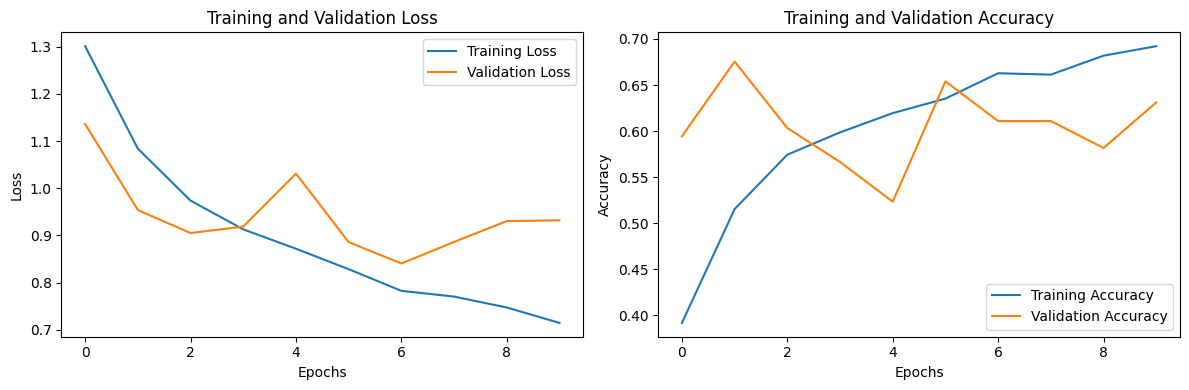

In [36]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


ResNet50 model

In [ ]:
# x_train = np.expand_dims(x_train, axis=-1)
# x_train = np.repeat(x_train, 3, axis=-1)
# x_val = np.expand_dims(x_val, -1)
# x_val = np.repeat(x_val, 3, axis=-1)


In [ ]:
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.initializers import HeNormal

# # # Load the ResNet50 model without the top layer (which is the classification layer)
# # base_model = ResNet50(include_top=False, input_shape=(300, 400, 3))

# # # Define a new model
# # model = Sequential()

# # # Add the base model (this is the pre-trained ResNet50 model)
# # model.add(base_model)

# # # Add a global average pooling layer to reduce the dimensionality
# # model.add(GlobalAveragePooling2D())

# # # Add a batch normalization layer
# # model.add(BatchNormalization())

# # # Add a dense layer with 128 units and ReLU activation
# # model.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))

# # # Add a dropout layer for regularization
# # model.add(Dropout(0.5))

# # # Add the output layer
# # model.add(Dense(4, activation='softmax'))

# # # Make the base model non-trainable
# # for layer in base_model.layers:
# #     layer.trainable = False

# # # Compile the model
# # optimizer = Adam(learning_rate=0.001)
# # model.compile(optimizer=optimizer,
# #               loss='sparse_categorical_crossentropy',
# #               metrics=['accuracy'])

# # # Define the early stopping callback
# # early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # # ModelCheckpoint callback
# # checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# # # Data augmentation
# # datagen = ImageDataGenerator(rotation_range=10,
# #                              width_shift_range=0.1,
# #                              height_shift_range=0.1,
# #                              horizontal_flip=True)

# # # fits the model on batches with real-time data augmentation:
# # model.fit(datagen.flow(x_train, y_train, batch_size=32),
# #           steps_per_epoch=len(x_train) / 32,
# #           epochs=20,
# #           validation_data=(x_val, y_val),
# #           callbacks=[early_stopping, checkpoint])


In [ ]:
# from keras.applications import ResNet50
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, GlobalAveragePooling2D
# from keras.optimizers import Adam
# from keras import regularizers
# from keras.callbacks import EarlyStopping
# from keras.preprocessing.image import ImageDataGenerator

# # Early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# # Data augmentation
# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)

# datagen.fit(x_train)

# # Load the ResNet50 model without the top layer (which is the classification layer)
# base_model = ResNet50(include_top=False, input_shape=(300, 400, 3))

# # Define a new model
# model = Sequential()

# # Add the base model (this is the pre-trained ResNet50 model)
# model.add(base_model)

# # Add a global average pooling layer to reduce the dimensionality
# model.add(GlobalAveragePooling2D())

# # Add a dense layer with 128 units and ReLU activation
# model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# # Add a dropout layer for regularization
# model.add(Dropout(0.5))

# # Add the output layer
# model.add(Dense(4, activation='softmax'))

# # Make only the top layers of the base model trainable
# for layer in base_model.layers[:-10]:
#     layer.trainable = False

# # Compile the model
# optimizer = Adam(learning_rate=0.0001)
# model.compile(optimizer=optimizer,
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# model.fit(datagen.flow(x_train, y_train, batch_size=32),
#           epochs=8,
#           validation_data=(x_val, y_val),
#           callbacks=[early_stopping])


Epoch 1/8
73/73 [==============================] - 884s 12s/step - loss: 3.2195 - accuracy: 0.5841 - val_loss: 3.5924 - val_accuracy: 0.2459
Epoch 2/8
73/73 [==============================] - 861s 12s/step - loss: 2.6626 - accuracy: 0.6739 - val_loss: 3.5613 - val_accuracy: 0.2459
Epoch 3/8
73/73 [==============================] - 864s 12s/step - loss: 2.3324 - accuracy: 0.7015 - val_loss: 3.4491 - val_accuracy: 0.2459
Epoch 4/8
73/73 [==============================] - ETA: 0s - loss: 2.0847 - accuracy: 0.7166

KeyboardInterrupt: ignored

Evaluate the model

In [ ]:
# # Evaluate the model on the training data
# train_loss, train_accuracy = model.evaluate(x_train, y_train)

# # Evaluate the model on the validation data
# val_loss, val_accuracy = model.evaluate(X_val, y_val)

# # Print the results
# print("Training Accuracy:", train_accuracy)
# print("Training Loss:", train_loss)
# print("Validation Accuracy:", val_accuracy)
# print("Validation Loss:", val_loss)


NameError: ignored

Upload test data

In [38]:
import os
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define function to load and preprocess the images
def load_and_preprocess_images(path, label, img_height=300, img_width=400):
    images = []
    labels = []
    for img in os.listdir(path):
        # Load image
        img = load_img(os.path.join(path, img), target_size=(img_height, img_width), color_mode="grayscale")
        img = img_to_array(img)
        img = img / 255.0  # normalize to [0,1]
        images.append(img)
        labels.append(label)
    return images, labels

# Define paths to the image directories
bactPneu_test = "/content/dataset/Covid19 XRAY/testData/BactPneumonia"
covidData_test = "/content/dataset/Covid19 XRAY/testData/Covid-19"
noramalData_test = "/content/dataset/Covid19 XRAY/testData/Normal"
viralPneu_test = "/content/dataset/Covid19 XRAY/testData/ViralPneumonia"

# Load and preprocess the images
bactPneu_images, bactPneu_labels = load_and_preprocess_images(bactPneu_test, label=0)
covidData_images, covidData_labels = load_and_preprocess_images(covidData_test, label=1)
noramalData_images, noramalData_labels = load_and_preprocess_images(noramalData_test, label=2)
viralPneu_images, viralPneu_labels = load_and_preprocess_images(viralPneu_test, label=3)

# Concatenate the data and labels
X_test = np.concatenate([bactPneu_images, covidData_images, noramalData_images, viralPneu_images], axis=0)
y_test = np.concatenate([bactPneu_labels, covidData_labels, noramalData_labels, viralPneu_labels], axis=0)



model evaluation on test set:

In [39]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: ", accuracy)
print("Test Loss: ", loss)


13/13 [==============================] - 5s 361ms/step - loss: 0.9258 - accuracy: 0.6313
Test Accuracy:  0.631313145160675
Test Loss:  0.9258351922035217
